In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [50]:
data = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/Final Setup/dataset/condensed_data_3_28_4anglesA.csv')
data.head()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y,a
0,0.455694,-66.878788,0.602957,-59.091898,1.126873,-59.759676,0.388383,-55.083102,8,3,3
1,1.092510,-61.473898,1.880662,-59.411015,0.365428,-55.353161,0.000000,0.000000,9,4,3
2,2.064072,-61.387911,0.448910,-53.873030,0.396486,-52.027826,0.450729,-55.686446,5,5,3
3,1.417068,-63.967837,1.179202,-58.408155,1.153554,-57.107136,1.088665,-57.945354,6,7,3
4,0.571581,-66.878788,1.183826,-62.419752,1.526860,-61.282731,0.869344,-56.629988,9,2,3


In [51]:
data.describe()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y,a
count,966.000000,968.000000,967.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,1.149283,-61.038490,1.054036,-59.171580,0.985841,-58.502219,1.003823,-59.488031,5.000000,5.000000,4.000000
std,0.565371,3.842178,0.415313,3.904617,0.399905,3.417768,0.446711,7.192863,3.163912,3.163912,2.237224
min,0.000000,-67.958333,0.272577,-66.718750,0.212501,-65.799357,0.000000,-67.885417,0.000000,0.000000,1.000000
25%,0.752438,-63.849276,0.736752,-62.058905,0.699569,-61.011636,0.700431,-62.859797,2.000000,2.000000,2.500000
50%,1.078386,-61.701372,1.009943,-59.861427,0.933155,-58.729633,0.947794,-60.334430,5.000000,5.000000,4.000000
75%,1.405455,-58.614726,1.312225,-56.809231,1.219060,-55.645301,1.256881,-57.353427,8.000000,8.000000,5.500000
max,4.978169,-50.446408,2.671722,-48.760872,3.523851,-49.655651,3.176320,0.000000,10.000000,10.000000,7.000000


In [52]:
# Replace NaN values with 0
data = data.fillna(0)
data.describe()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y,a
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,1.146909,-61.038490,1.052947,-59.171580,0.985841,-58.502219,1.003823,-59.488031,5.000000,5.000000,4.000000
std,0.567194,3.842178,0.416478,3.904617,0.399905,3.417768,0.446711,7.192863,3.163912,3.163912,2.237224
min,0.000000,-67.958333,0.000000,-66.718750,0.212501,-65.799357,0.000000,-67.885417,0.000000,0.000000,1.000000
25%,0.750386,-63.849276,0.735617,-62.058905,0.699569,-61.011636,0.700431,-62.859797,2.000000,2.000000,2.500000
50%,1.076269,-61.701372,1.009937,-59.861427,0.933155,-58.729633,0.947794,-60.334430,5.000000,5.000000,4.000000
75%,1.404668,-58.614726,1.312036,-56.809231,1.219060,-55.645301,1.256881,-57.353427,8.000000,8.000000,5.500000
max,4.978169,-50.446408,2.671722,-48.760872,3.523851,-49.655651,3.176320,0.000000,10.000000,10.000000,7.000000


In [53]:
count = 0
for i in range(len(data['A1_mean'])):
    if data['A4_mean'][i] == 0:
        count +=1
print(count)

11


In [54]:
df = data.drop(["A3_sd"], axis=1)
print(df.head())
df.describe()

      A1_sd    A1_mean     A2_sd    A2_mean    A3_mean     A4_sd    A4_mean  \
0  0.455694 -66.878788  0.602957 -59.091898 -59.759676  0.388383 -55.083102   
1  1.092510 -61.473898  1.880662 -59.411015 -55.353161  0.000000   0.000000   
2  2.064072 -61.387911  0.448910 -53.873030 -52.027826  0.450729 -55.686446   
3  1.417068 -63.967837  1.179202 -58.408155 -57.107136  1.088665 -57.945354   
4  0.571581 -66.878788  1.183826 -62.419752 -61.282731  0.869344 -56.629988   

   x  y  a  
0  8  3  3  
1  9  4  3  
2  5  5  3  
3  6  7  3  
4  9  2  3  


,A1_sd,A1_mean,A2_sd,A2_mean,A3_mean,A4_sd,A4_mean,x,y,a
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,1.146909,-61.038490,1.052947,-59.171580,-58.502219,1.003823,-59.488031,5.000000,5.000000,4.000000
std,0.567194,3.842178,0.416478,3.904617,3.417768,0.446711,7.192863,3.163912,3.163912,2.237224
min,0.000000,-67.958333,0.000000,-66.718750,-65.799357,0.000000,-67.885417,0.000000,0.000000,1.000000
25%,0.750386,-63.849276,0.735617,-62.058905,-61.011636,0.700431,-62.859797,2.000000,2.000000,2.500000
50%,1.076269,-61.701372,1.009937,-59.861427,-58.729633,0.947794,-60.334430,5.000000,5.000000,4.000000
75%,1.404668,-58.614726,1.312036,-56.809231,-55.645301,1.256881,-57.353427,8.000000,8.000000,5.500000
max,4.978169,-50.446408,2.671722,-48.760872,-49.655651,3.176320,0.000000,10.000000,10.000000,7.000000


In [63]:
predict = ['x','y','a']

In [68]:
x = np.array(df.drop(predict, axis=1))
y = np.array(df[predict])

In [69]:
# from sklearn.preprocessing import MinMaxScaler
# mmx = MinMaxScaler()
# data_feature = pd.DataFrame(mmx.fit_transform(x))
# print(data_feature.describe())


Importing test data


In [70]:
x_train, x_test, y_train, y_test =  sklearn.model_selection.train_test_split(x,y, test_size=None, shuffle=True)

**KNeighborsRegressor**

In [78]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

error = []

#Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_squared_error(y_test, pred_i)
    error.append(mae)

errorWithWeight = []

for i in range(1, 40):
  knn_weight = KNeighborsRegressor(n_neighbors=i,weights='distance')
  knn_weight.fit(x_train, y_train)
  pred_i = knn_weight.predict(x_test)
  mae_weight = mean_squared_error(y_test, pred_i)
  errorWithWeight.append(mae_weight)

errorWith_W_A = []

for i in range(1, 40):
  knn_wA = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='kd_tree')
  knn_wA.fit(x_train, y_train)
  pred_i = knn_wA.predict(x_test)
  mae_wA = mean_squared_error(y_test, pred_i)
  errorWith_W_A.append(mae_wA)


print (error)
print (errorWithWeight)
print (errorWith_W_A)

[4.192837465564739, 3.2331267217630852, 3.5896847260483615, 3.692665289256199, 3.698787878787876, 3.7258570554025106, 3.7664305391578097, 3.7571668388429758, 3.80087065945652, 3.865550964187328, 3.9332126676228873, 3.9716674318947085, 4.016773436353852, 4.046733569460842, 4.106127946127944, 4.114615616391185, 4.1586595746708985, 4.132278168894332, 4.127160550353699, 4.157610192837468, 4.1569467088947585, 4.219933178516952, 4.2274602009092455, 4.229314929599024, 4.248187327823691, 4.277061225487798, 4.297191896518496, 4.30233632709282, 4.330806170012742, 4.358565962656872, 4.378641681214758, 4.373052255509641, 4.385101958730809, 4.381254349090146, 4.392947658402204, 4.412746998605585, 4.402734094380286, 4.404440717932281, 4.427499850576773]
[4.192837465564739, 2.9535468264004057, 3.092292997565636, 3.083728706228173, 3.088895207494218, 3.1272786972326863, 3.1810715543551322, 3.1915724572077164, 3.2328638020158356, 3.289172297953852, 3.3523810175999533, 3.3969895838205324, 3.440064264368

[4.192837465564739, 3.2331267217630852, 3.5896847260483615, 3.692665289256199, 3.698787878787876, 3.7258570554025106, 3.7664305391578097, 3.7571668388429758, 3.80087065945652, 3.865550964187328, 3.9332126676228873, 3.9716674318947085, 4.016773436353852, 4.046733569460842, 4.106127946127944, 4.114615616391185, 4.1586595746708985, 4.132278168894332, 4.127160550353699, 4.157610192837468, 4.1569467088947585, 4.219933178516952, 4.2274602009092455, 4.229314929599024, 4.248187327823691, 4.277061225487798, 4.297191896518496, 4.30233632709282, 4.330806170012742, 4.358565962656872, 4.378641681214758, 4.373052255509641, 4.385101958730809, 4.381254349090146, 4.392947658402204, 4.412746998605585, 4.402734094380286, 4.404440717932281, 4.427499850576773]


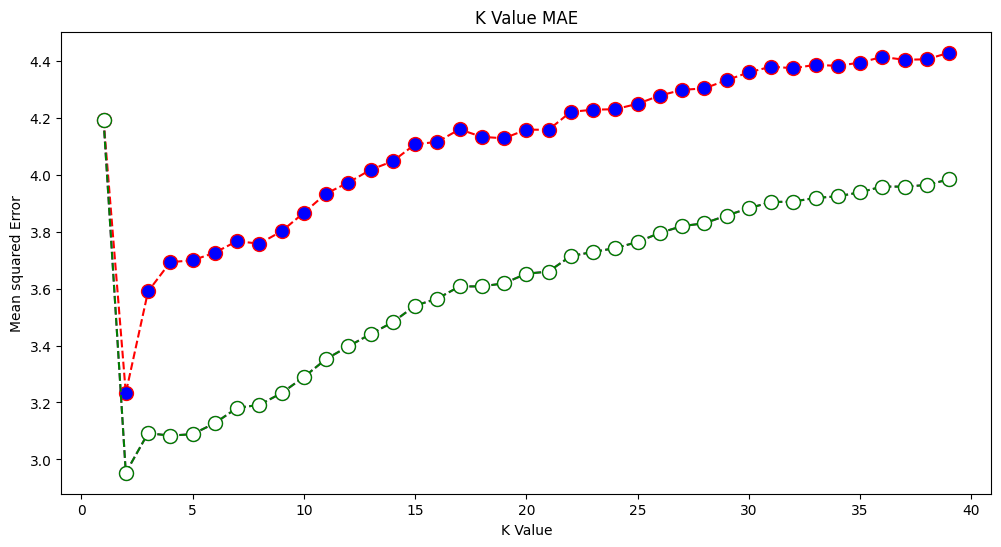

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.plot(range(1, 40), errorWithWeight, color='m',
         linestyle='dashed', marker='o',
         markerfacecolor='y', markersize=10)

plt.plot(range(1, 40), errorWith_W_A, color='g',
         linestyle='dashed', marker='o',
         markerfacecolor='w', markersize=10)


plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean squared Error')

print (error)


In [77]:

model_k = KNeighborsRegressor(n_neighbors=1, weights='distance',algorithm='kd_tree')#,algorithm='brute'
model_k.fit(x_train,y_train)


predictions = model_k.predict(x_test)
y_train_pred = model_k.predict(x_train)

print('R squared on training set:')
print(r2_score(y_train, y_train_pred))

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model_k, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MSE with Orignal data: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'mae with test data: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

acc =  model_k.score(x_test, y_test)
print(acc)

R squared on training set:
1.0
MSE with Orignal data: 2.544 (0.789)
mae with test data: 0.9035812672176308
mse: 4.192837465564739
rmse: 2.041183855099813
0.4064956986962755


Find the Best Parameters for KNeighborsRegressor



Text(0.5, 1.0, 'Blue: Test data , Orange is Predictions Using KNeighborsRegressor')

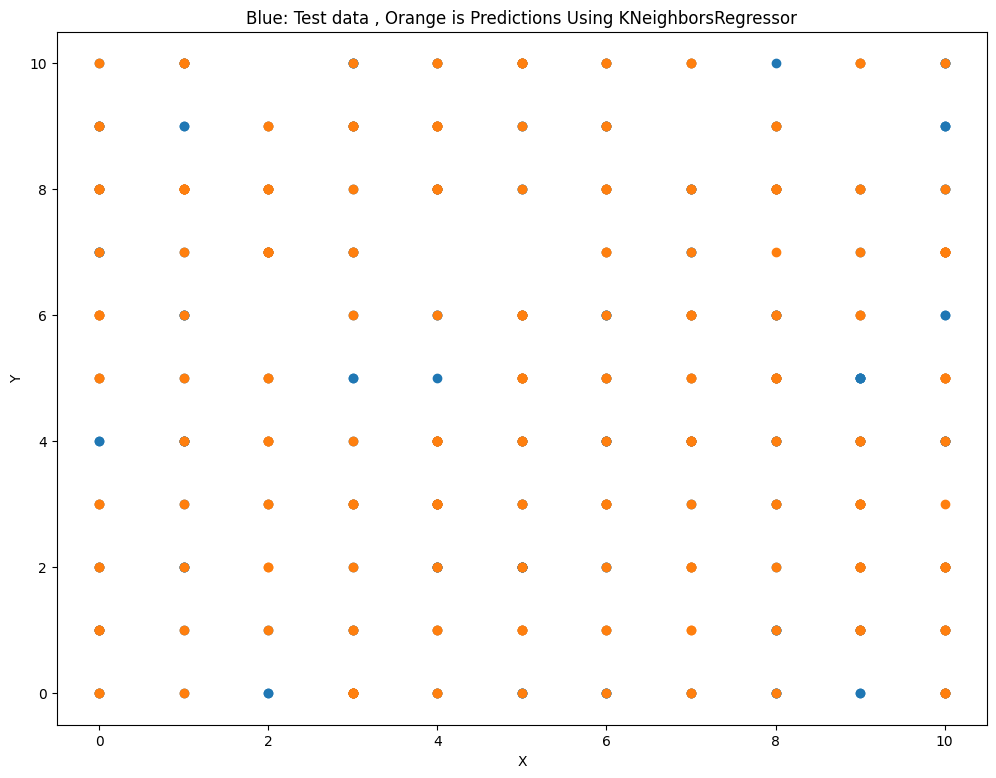

In [19]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue: Test data , Orange is Predictions Using KNeighborsRegressor')

In [20]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])

In [21]:
over_lap

[array([3., 7.]),
 array([3., 0.]),
 array([0., 2.]),
 array([9., 2.]),
 array([4., 2.]),
 array([8., 5.]),
 array([1., 4.]),
 array([10.,  7.]),
 array([8., 4.]),
 array([2., 9.]),
 array([3., 9.]),
 array([ 5., 10.]),
 array([2., 3.]),
 array([ 6., 10.]),
 array([9., 3.]),
 array([2., 8.]),
 array([8., 5.]),
 array([6., 4.]),
 array([3., 4.]),
 array([3., 1.]),
 array([3., 9.]),
 array([5., 2.]),
 array([8., 3.]),
 array([9., 6.]),
 array([2., 1.]),
 array([6., 5.]),
 array([8., 9.]),
 array([0., 8.]),
 array([0., 5.]),
 array([1., 3.]),
 array([1., 8.]),
 array([0., 8.]),
 array([ 9., 10.]),
 array([1., 6.]),
 array([10.,  2.]),
 array([1., 0.]),
 array([0., 0.]),
 array([7., 0.]),
 array([10.,  0.]),
 array([5., 0.]),
 array([4., 2.]),
 array([9., 4.]),
 array([5., 5.]),
 array([7., 2.]),
 array([1., 2.]),
 array([6., 4.]),
 array([ 4., 10.]),
 array([9., 1.]),
 array([10.,  4.]),
 array([2., 7.]),
 array([8., 0.]),
 array([0., 1.]),
 array([0., 3.]),
 array([3., 2.]),
 array([10.,

<ipython-input-22-fd095712aefa>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

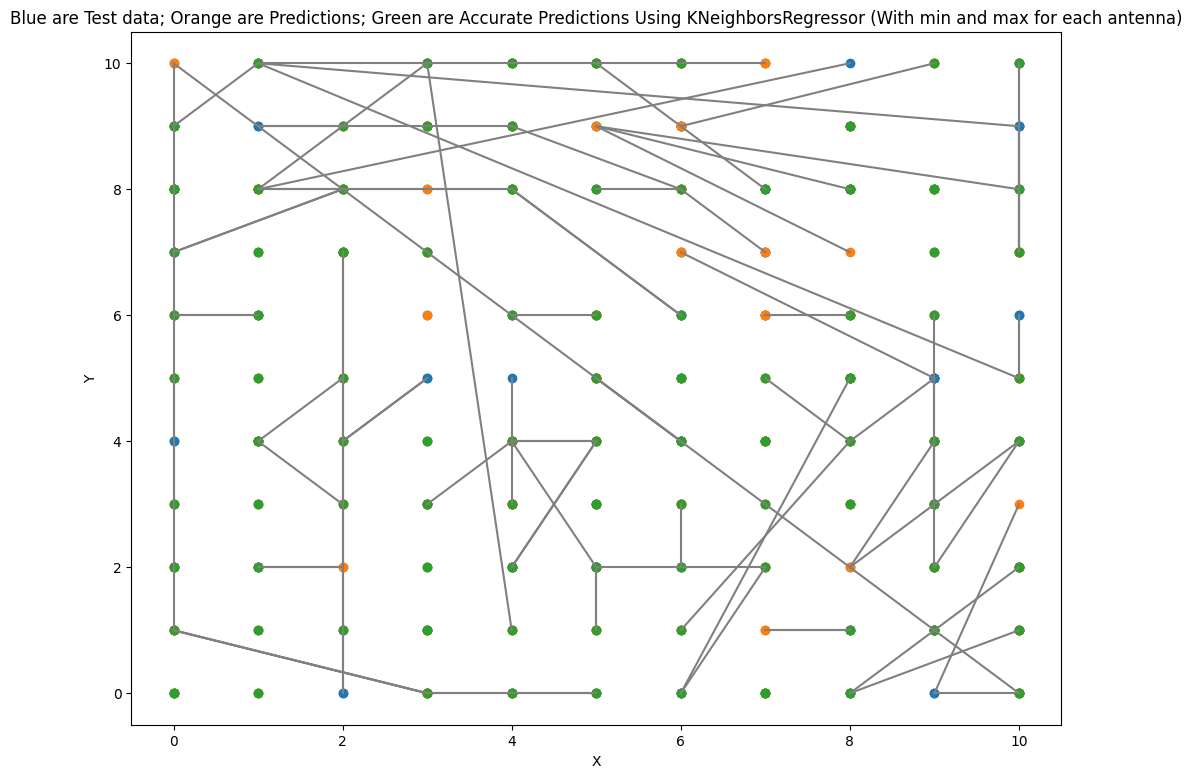

In [22]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

In [23]:
from sklearn.model_selection import cross_val_score

# for the knn Classifier:
scores = cross_val_score(model_k, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)

knn_rmse_scores = np.sqrt(-scores)

print('Scores: {}\nMean: {}\nStandard deviation: {}'.format(
    knn_rmse_scores, knn_rmse_scores.mean(), knn_rmse_scores.std()))

Scores: [1.92140074 2.22059327 2.14556479 2.10909361 1.77919005]
Mean: 2.0351684945654753
Standard deviation: 0.16155660161520136


In [36]:
data_test = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/Final Setup/dataset/condensed_data_r12a.csv')
data_test.head()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y,a
0,0.377964,-66.285714,0.212031,-53.544494,1.653587,-62.105719,0.669327,-66.758333,0,1,3
1,1.150062,-62.428848,1.007721,-60.612124,0.878862,-61.902112,0.000000,0.000000,9,7,7
2,0.472787,-65.829365,1.124974,-57.281657,0.696453,-55.707423,1.490865,-60.995211,5,0,7
3,1.401139,-57.558525,1.473461,-58.091188,1.597732,-60.115374,1.041990,-61.240757,1,1,1
4,1.302094,-63.425079,0.646414,-53.225833,1.147283,-53.440370,1.379043,-57.044722,5,2,3


In [37]:
# Check for NaN values in each column
nan_check = data_test.isna().sum()

# Display the count of NaN values in each column
print(nan_check)

A1_sd      1
A1_mean    0
A2_sd      0
A2_mean    0
A3_sd      0
A3_mean    0
A4_sd      0
A4_mean    0
x          0
y          0
a          0
dtype: int64


In [38]:
count = 0
for i in range(len(data_test['A1_mean'])):
    if data_test['A4_mean'][i] == 0:
        count +=1
print(count)

2


In [39]:
# Replace NaN values with 0
data_test = data_test.fillna(0)
data_test.describe()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y,a
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,1.016192,-61.439506,1.157325,-60.572100,1.100717,-59.434884,0.962187,-57.138244,5.400000,5.70000,3.666667
std,0.566746,3.900326,0.569799,3.916164,0.362653,3.410836,0.454896,15.879731,3.212046,3.39523,2.537081
min,0.000000,-67.113095,0.212031,-64.963157,0.485091,-64.712370,0.000000,-66.758333,0.000000,0.00000,1.000000
25%,0.713916,-64.742170,0.729628,-63.333418,0.842442,-62.143146,0.681933,-63.178509,3.000000,3.00000,1.000000
50%,0.944066,-61.338441,1.178922,-61.890090,1.082556,-60.019646,1.041250,-61.725580,6.000000,6.00000,3.000000
75%,1.265475,-58.937755,1.431984,-58.551637,1.385679,-56.650470,1.220766,-58.408701,8.000000,8.75000,6.500000
max,2.552826,-53.428695,3.136388,-50.559962,1.733496,-52.701102,1.855447,0.000000,10.000000,10.00000,7.000000


In [40]:
data_test = data_test.drop(["A3_sd"], axis=1)
print(data_test.head())
data_test.describe()

      A1_sd    A1_mean     A2_sd    A2_mean    A3_mean     A4_sd    A4_mean  \
0  0.377964 -66.285714  0.212031 -53.544494 -62.105719  0.669327 -66.758333   
1  1.150062 -62.428848  1.007721 -60.612124 -61.902112  0.000000   0.000000   
2  0.472787 -65.829365  1.124974 -57.281657 -55.707423  1.490865 -60.995211   
3  1.401139 -57.558525  1.473461 -58.091188 -60.115374  1.041990 -61.240757   
4  1.302094 -63.425079  0.646414 -53.225833 -53.440370  1.379043 -57.044722   

   x  y  a  
0  0  1  3  
1  9  7  7  
2  5  0  7  
3  1  1  1  
4  5  2  3  


,A1_sd,A1_mean,A2_sd,A2_mean,A3_mean,A4_sd,A4_mean,x,y,a
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000
mean,1.016192,-61.439506,1.157325,-60.572100,-59.434884,0.962187,-57.138244,5.400000,5.70000,3.666667
std,0.566746,3.900326,0.569799,3.916164,3.410836,0.454896,15.879731,3.212046,3.39523,2.537081
min,0.000000,-67.113095,0.212031,-64.963157,-64.712370,0.000000,-66.758333,0.000000,0.00000,1.000000
25%,0.713916,-64.742170,0.729628,-63.333418,-62.143146,0.681933,-63.178509,3.000000,3.00000,1.000000
50%,0.944066,-61.338441,1.178922,-61.890090,-60.019646,1.041250,-61.725580,6.000000,6.00000,3.000000
75%,1.265475,-58.937755,1.431984,-58.551637,-56.650470,1.220766,-58.408701,8.000000,8.75000,6.500000
max,2.552826,-53.428695,3.136388,-50.559962,-52.701102,1.855447,0.000000,10.000000,10.00000,7.000000


In [41]:
ox_test = np.array(data_test.drop(predict, axis=1))
oy_test = np.array(data_test[predict])

# data_feature_test = pd.DataFrame(mmx.fit_transform(x_test))
# print(data_feature_test.describe())


In [42]:
predictions = model_k.predict(ox_test)

In [43]:
len(predictions)

30

In [44]:
len(oy_test)

30

In [45]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == oy_test[i][0] and predictions[i][1] == oy_test[i][1]):
        over_lap.append(predictions[i])

<ipython-input-46-d27900c5d90c>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([oy_test[i][0],predictions[i][0]], [oy_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

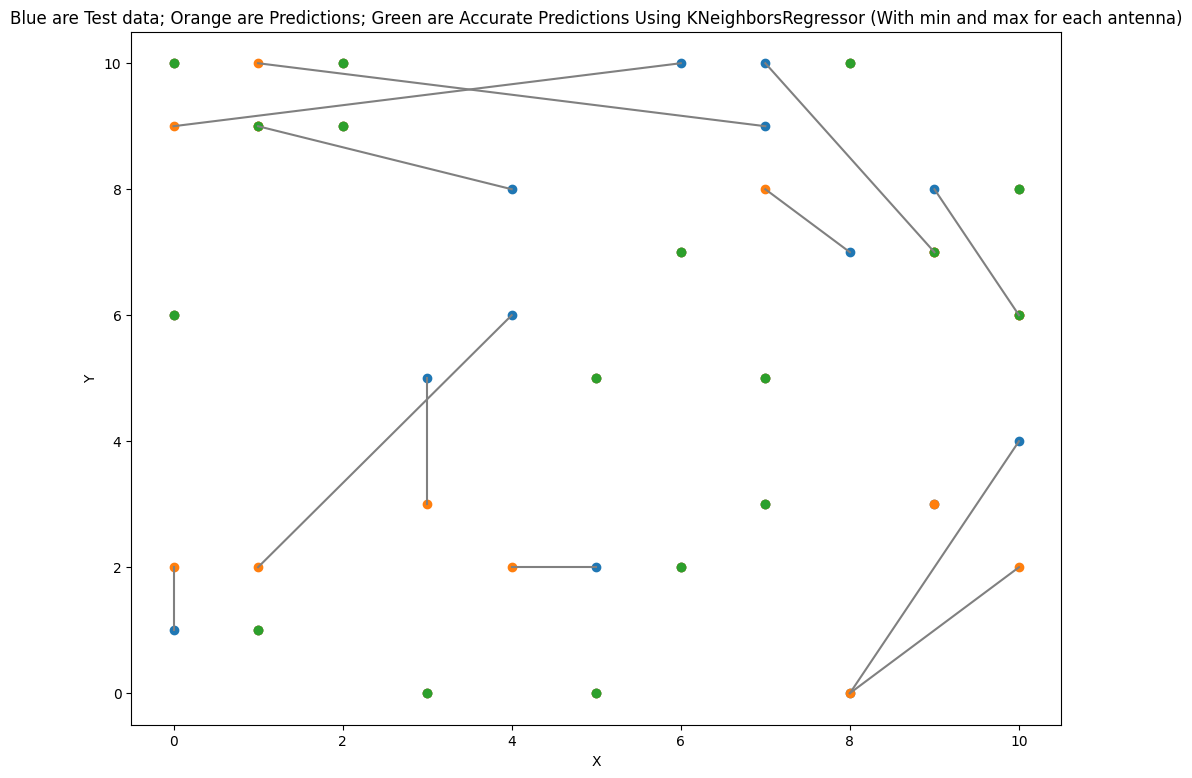

In [46]:
plt.figure(figsize=(12, 9))
plt.scatter(*zip(*oy_test))
plt.scatter(*zip(*predictions))
plt.scatter(*zip(*over_lap))
for i in range(0, len(oy_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([oy_test[i][0],predictions[i][0]], [oy_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

In [48]:
mae = mean_absolute_error(oy_test, predictions)
mse = mean_squared_error(oy_test, predictions)
rmse = mean_squared_error(oy_test, predictions, squared=False)

print(f'mae with test data: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

acc =  model_k.score(ox_test, oy_test)
print(acc)

mae with test data: 0.8166666666666667
mse: 2.716666666666667
rmse: 1.6306361338472923
0.7377836560072049


In [47]:
from joblib import dump
# Save the model to a file with .pkl extension
dump(model_DT, 'decision_tree_model.pkl')


NameError: name 'model_DT' is not defined